In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
cardio = pd.read_csv("https://raw.githubusercontent.com/Pravallika-Myneni/CardioGoodFitness/main/CardioGoodFitness.csv")

In [3]:
cardio.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [4]:
cardio.shape

(180, 9)

In [5]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


No Null values in the data

In [6]:
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


##Initial Data Exploration

In [7]:
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [8]:
cardio.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c6d57cd0>,
      dtype=object)

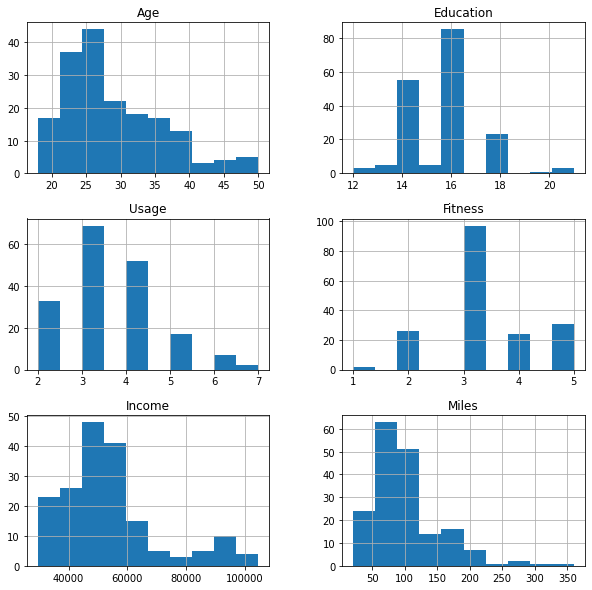

In [9]:
cardio.hist(figsize=(10,10))

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


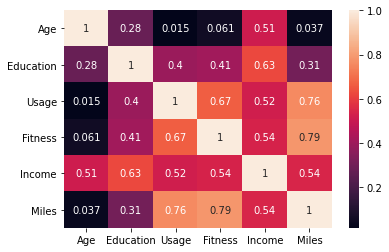

In [10]:
corr_mat = cardio.corr()
print(corr_mat)
sns.heatmap(corr_mat,annot=True)

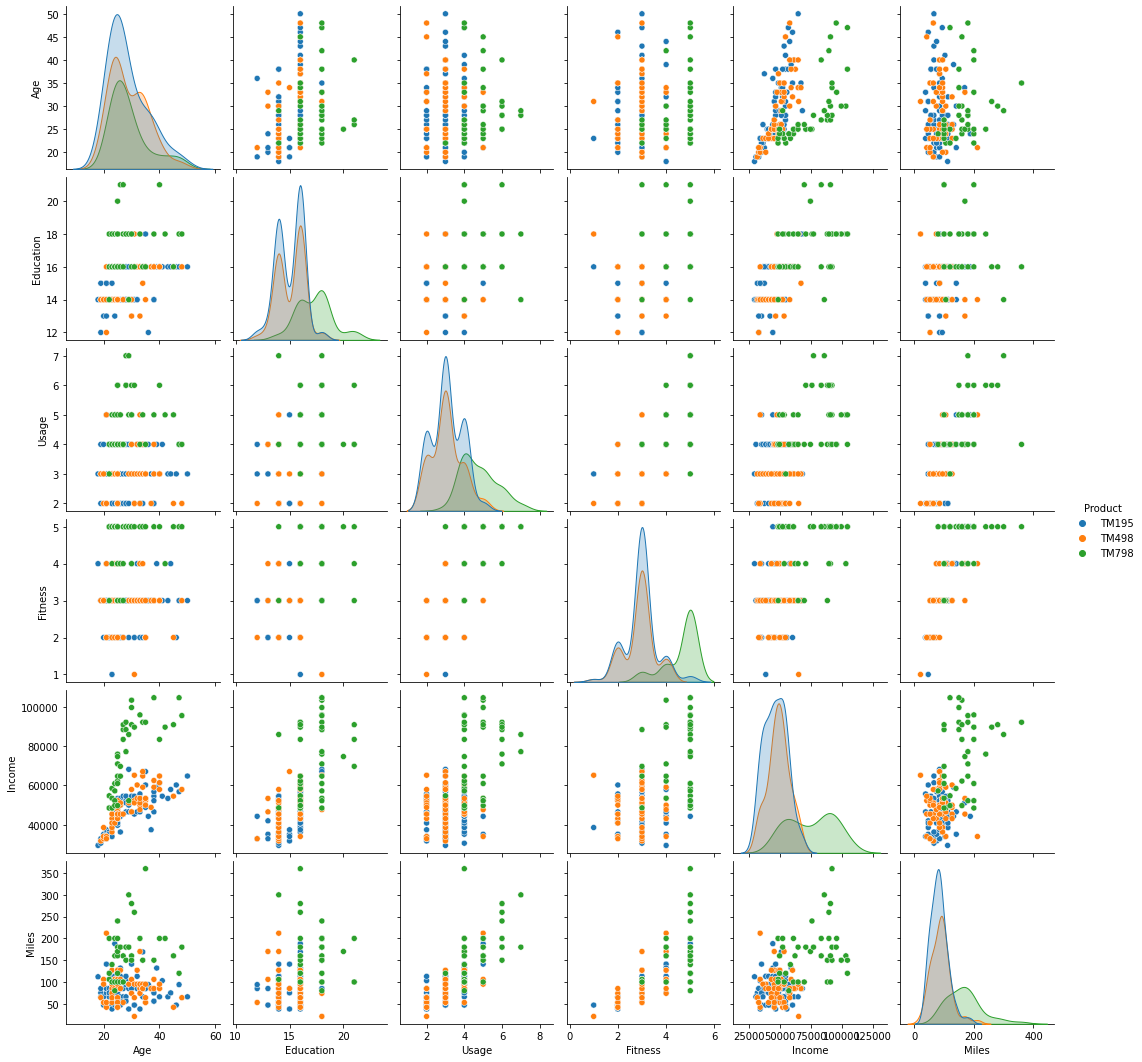

In [11]:
import seaborn as sns
sns.pairplot(cardio,hue="Product")

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem.
For each column we need to display : **Variable, Type :** (Categorical or numerical) **Expectation, Conclusion**

##**Let's Start with numerical variables**

##Miles

In [12]:
cardio['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [13]:
import plotly.express as px
fig = px.histogram(cardio, x= "Miles",color='Product')
fig.show()

Variable : Miles

Type : Numerical

Expectation: 103.13 miles


##Income

In [14]:
cardio['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [15]:
fig = px.histogram(cardio, x= "Income",color='Product')
fig.show()

Variable : Income

Type : Numerical

Average income : 53720


## Fitness

In [16]:
cardio['Fitness'].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

The average finess level of people buying all three threadmills is 3

## Usage

In [17]:
cardio['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

Most of the people use threadmill to a level of 3.46

## Education 

In [18]:
cardio['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

## Age

In [19]:
cardio['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

The average age of user is 29

##**Categorical variables**

##Marital Status

In [20]:
set(cardio.MaritalStatus)

{'Partnered', 'Single'}

In [21]:
print(len(cardio[cardio['MaritalStatus']=='Single'])/(len(cardio['MaritalStatus']))*100)
print(len(cardio[cardio['MaritalStatus']!='Single'])/(len(cardio['MaritalStatus']))*100)

40.55555555555556
59.44444444444444


##Gender

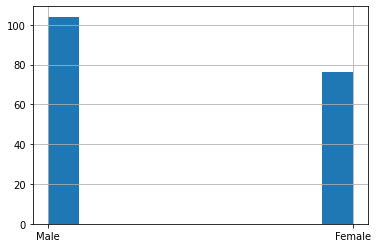

In [22]:
cardio.Gender.hist()

## Product

In [23]:
set(cardio.Product)


{'TM195', 'TM498', 'TM798'}

In [24]:
print(len(cardio[cardio['Product']=='TM195'])/(len(cardio['Product']))*100)
print(len(cardio[cardio['Product']=='TM498'])/(len(cardio['Product']))*100)
print(len(cardio[cardio['Product']=='TM798'])/(len(cardio['Product']))*100)

44.44444444444444
33.33333333333333
22.22222222222222


Most of the users buy TM195

**Data by Product**

In [25]:
TM195 = cardio[cardio['Product']=='TM195']
TM195 = TM195.reset_index()
TM195 = TM195.drop(columns=['Product','index'])
TM195.head()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,18,Male,14,Single,3,4,29562,112
1,19,Male,15,Single,2,3,31836,75
2,19,Female,14,Partnered,4,3,30699,66
3,19,Male,12,Single,3,3,32973,85
4,20,Male,13,Partnered,4,2,35247,47


In [26]:
TM498 = cardio[cardio['Product']=='TM498']
TM498 = TM498.reset_index()
TM498 = TM498.drop(columns=['Product','index'])
TM498.head()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,19,Male,14,Single,3,3,31836,64
1,20,Male,14,Single,2,3,32973,53
2,20,Female,14,Partnered,3,3,34110,106
3,20,Male,14,Single,3,3,38658,95
4,21,Female,14,Partnered,5,4,34110,212


In [27]:
TM798 = cardio[cardio['Product']=='TM798']
TM798 = TM798.reset_index()
TM798 = TM798.drop(columns=['Product','index'])
TM798.head()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,22,Male,14,Single,4,3,48658,106
1,22,Male,16,Single,3,5,54781,120
2,22,Male,18,Single,4,5,48556,200
3,23,Male,16,Single,4,5,58516,140
4,23,Female,18,Single,5,4,53536,100


#**TM195**

In [28]:
TM195.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


To get the statistics of categorical variables lets encode the categorical data

**In Gender column 1 represents Male and 0 represents Female**

**In the MaritalStatus 1 represents Single and 0 represents Patnered**


In [29]:
tm195 = pd.get_dummies(data= TM195,drop_first=True)
tm195 = tm195.rename(columns= {"Gender_Male": "Gender", "MaritalStatus_Single": "MaritalStatus"})
tm195.head()

,Age,Education,Usage,Fitness,Income,Miles,Gender,MaritalStatus
0,18,14,3,4,29562,112,1,1
1,19,15,2,3,31836,75,1,1
2,19,14,4,3,30699,66,0,0
3,19,12,3,3,32973,85,1,1
4,20,13,4,2,35247,47,1,0


In [30]:
tm195.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0
Gender,80.0,0.5000,0.503155,0.0,0.0,0.5,1.0,1.0
MaritalStatus,80.0,0.4000,0.492989,0.0,0.0,0.0,1.0,1.0


**The mean column gives the profile of an average user : Age: 29**

**with 15 years of Education who uses the threadmill of level 3 with fitness level 3 and runs 82.79 miles**

**Income : 46418**

**Gender : Both women and men are equally likeLy**

**Patnered users are more likely to buy**

#**TM498**

In [31]:
tm498 = pd.get_dummies(data= TM498,drop_first=True)
tm498 = tm498.rename(columns= {"Gender_Male": "Gender", "MaritalStatus_Single": "MaritalStatus"})
tm498.head()

,Age,Education,Usage,Fitness,Income,Miles,Gender,MaritalStatus
0,19,14,3,3,31836,64,1,1
1,20,14,2,3,32973,53,1,1
2,20,14,3,3,34110,106,0,0
3,20,14,3,3,38658,95,1,1
4,21,14,5,4,34110,212,0,0


In [32]:
tm498.mean()


Age                 28.900000
Education           15.116667
Usage                3.066667
Fitness              2.900000
Income           48973.650000
Miles               87.933333
Gender               0.516667
MaritalStatus        0.400000
dtype: float64

The average user profile of **TM498** is :

  Age : 29

  Education: 15+ years

  Usage level : 3

  Fitness level: 2.9

  Income : 48973

  Miles: Who runs 87.93

  Gender: Males are 1.6% more likely to buy
  
  Marital Status: Patnered are more likely to buy

#**TM798**

In [33]:
tm798 = pd.get_dummies(data= TM798,drop_first=True)
tm798 = tm798.rename(columns= {"Gender_Male": "Gender", "MaritalStatus_Single": "MaritalStatus"})
tm798.head()

,Age,Education,Usage,Fitness,Income,Miles,Gender,MaritalStatus
0,22,14,4,3,48658,106,1,1
1,22,16,3,5,54781,120,1,1
2,22,18,4,5,48556,200,1,1
3,23,16,4,5,58516,140,1,1
4,23,18,5,4,53536,100,0,1


In [34]:
average = tm798.mean()
average

Age                 29.100
Education           17.325
Usage                4.775
Fitness              4.625
Income           75441.575
Miles              166.900
Gender               0.825
MaritalStatus        0.425
dtype: float64

Unlike other two TM798 is highly potential to be bought by males

The average age of user is 29 with 17 years of education with 4.8 usage level and 4.6 fitness and who runs 166.9 miles

## All the three average user profiles at a glance

In [35]:
User_Profiles = {}
User_Profiles['TM195'] = tm195.mean()
User_Profiles['TM498'] = tm498.mean()
User_Profiles['TM798'] = tm798.mean()
User_Profiles_df = pd.DataFrame(User_Profiles)
User_Profiles_df

,TM195,TM498,TM798
Age,28.5500,28.900000,29.100
Education,15.0375,15.116667,17.325
Usage,3.0875,3.066667,4.775
Fitness,2.9625,2.900000,4.625
Income,46418.0250,48973.650000,75441.575
Miles,82.7875,87.933333,166.900
Gender,0.5000,0.516667,0.825
MaritalStatus,0.4000,0.400000,0.425
